# Project: Wrangling and Analyze Data

## Data Gathering


In [1]:
#importing necessary packages for the wrangling project
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
%matplotlib inline
import numpy as np
import json

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#twitter archive enhanced dataset loaded as df_1
df_1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#image predictions dataset downloaded through its URL using the requests library
URL = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
open("image-predictions.tsv", "wb").write(response.content)

335079

In [5]:
# image predictions dataset loaded as df_2
df_2=pd.read_csv('image-predictions.tsv', sep='\t')
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#Twitter_api.py Code
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [18]:
df_list=[]
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets=json.loads(line)
        tweet_id=tweets['id']
        retweet_count=tweets['retweet_count']
        favorite_count=tweets['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':favorite_count})
            
df_3=pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [19]:
df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data

In [7]:
#To check the statistical properties of the Twitter Archive enhanced dataset.
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
#To check the amount of entries and data types of the Twitter Archive enhanced dataset.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#To check the statistical properties of image Prediction Dataset.
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
#To check the amount of entries and data types of the image Prediction Dataset.
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#To check for the statistical properties of the Twitter json Dataset.
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [ ]:
#To check the amount of entries and data types of the Twitter json Dataset.
df_3.info()

### Quality issues
1. The retweets are not part of the analysis as they do not have original ratings and dog images.

2. Timestamp is in wrong datatype.

3. Suggested breed needed on  data.

4. rating numerator is inconsistent and not uniform.

5. not all algorithm prediction are dogs.

6. 'Tweet id' and 'in reply status id' is in wrong datatype.

7. The source needs to be unambiguous.

8. Not all values in Name Column are Dog's.

9. retweet count, favorite count, confidence level, rating numerator and rating denominator in wrong dataty




### Tidiness issues
1. Having three seperate Dataset seems not tidy, We'll merge all three Datasets into one and call it df

2. Dog stages repetition as Doggo, Floofer, Pupper, Puppo.

3. retweeted status Id,retweeted status user Id and retweeted  timestamp are null

## Cleaning Data

### Issue 1:  Having three seperate datasets seems untidy.

#### Define: 
Having three seperate datasets seems untidy, we'll merge all three into one and call it df. Merge all three datasets into one dataset

Code

In [21]:
#merge Image Prediction df_2 and twitter archive dataset df_1
#this merger is called df_4
df_4=df_1.merge(df_2, on ='tweet_id', how='left')

In [22]:
#merge the twitter json data df_3
#and the df_4(image prediction + twitter archive) to get a combined dataset named df
#merge on the tweet id
df= df_4.merge(df_3, on = 'tweet_id', how='left')

Test

In [23]:
df.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


In [24]:
#create a copy to clean df
df_clean=df.copy()

### Issue #2:  The retweets from the twitter archive enhanced are not needed as part of the analysis.

#### Define:
Retweets information are not required because they do not add to the information needed for the analysis and do not possess the original ratings, neither do they contain Images.

In [25]:
#The Twitter archive dataset has 181 retweets information
# They do not add any significance to the analysis
df_clean.retweeted_status_id.value_counts().sum()

181

#### Code

In [26]:
#The dataframe where retweeted info are mostly empty and are not the required part of the dataframe.
#we need to remove the columns all through the dataset that has retweet info has they are not needed 
#because they do not possess the the images and original ratings.
df_clean=df_clean[df_clean['retweeted_status_id'].isna()]

#### Test

In [27]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


### Issue #3: retweeted status Id,retweeted status user Id and retweeted timestamp are null.

Define: Retweeted status Id,Retweeted status user Id and Retweeted timestamp are null and not needed as they are now empty

Code

In [28]:
#retweeted status Id,retweeted status user Id and retweeted timestamp are all Null, 
#Hence they are not required for analysis
df_clean=df_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

Test

In [23]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261.0,20562.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158.0,12041.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0


### Issue #4: For the Twitter enhanced, the rating numerator are not uniform and not constant.

Define:
The rating numeraators and denominators for each dog tweet,needs to be extracted.

Code

In [29]:
#We can pick the decimals in the ratings using a regex
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

Test

In [30]:
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0


### Issue #5: For the Image Prediction, not all are dogs

Define: not all of the the predicted data are dogs, because the three algorithms return false in some of the 3 cases.

code

In [31]:
df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0


In [32]:
# combining the three Algorithm Confirmations using the XOR Operator
df_clean['algorithm123_dog']=(df_clean['p1_dog'] ^ (df_clean['p2_dog'] ^df_clean['p3_dog']))

In [33]:
#removing rows whose Dog Algorithm Confirmations is still false as they wont be necessary for analysis
df_clean=df_clean[df_clean['algorithm123_dog'] == True]

Test

In [34]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,algorithm123_dog
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,True
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0,True
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,...,True,Pomeranian,0.013884,True,chow,0.008167,True,7624.0,31166.0,True
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,...,True,Cardigan,0.027356,True,basenji,0.004633,True,8538.0,38818.0,True
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,...,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735.0,27672.0,True


### Issue #6: Dog stages repetition as Doggo, Floofer, Pupper, Puppo

#### Define: Doggo, Floofer, Pupper and Puppo are dog stages which need to be combined into one column.

#### Code

In [35]:
df_clean_clean=df_clean.copy()

In [36]:
#to replace the None Value with NaN
df_clean_clean['doggo']=df_clean_clean['doggo'].replace(to_replace='None', value=np.nan)
df_clean_clean['floofer']=df_clean_clean['floofer'].replace(to_replace='None', value=np.nan)
df_clean_clean['pupper']=df_clean_clean['pupper'].replace(to_replace='None', value=np.nan)
df_clean_clean['puppo']=df_clean_clean['puppo'].replace(to_replace='None', value=np.nan)

In [37]:
#using the melt function to combine all four stages into one 'dog_stage'
df_clean_clean=pd.melt(df_clean_clean, id_vars=["tweet_id"], value_name='dog_stage', value_vars=['doggo','floofer','pupper','puppo'])

In [38]:
df_clean_clean

,tweet_id,variable,dog_stage
0,892177421306343426,doggo,NaN
1,891815181378084864,doggo,NaN
2,891689557279858688,doggo,NaN
3,891327558926688256,doggo,NaN
4,890729181411237888,doggo,NaN
5,890609185150312448,doggo,NaN
6,890240255349198849,doggo,doggo
7,890006608113172480,doggo,NaN
8,889665388333682689,doggo,NaN
9,889638837579907072,doggo,NaN


In [39]:
#we've wanted to do away with variable column, its unncessary
df_clean_clean.drop(['variable'], axis=1, inplace=True)

In [40]:
#drop some duplicates contained in the two remaining columns
df_clean_clean.drop_duplicates(inplace=True)

In [41]:
#To filter dog stages containing NaN
df_clean_clean = df_clean_clean.loc[df_clean_clean['dog_stage'].notna()]

In [42]:
#To check for duplicates in the tweet Id column
# two tweets id can not be same, as they unique
df_clean_clean[df_clean_clean.tweet_id.duplicated()]

,tweet_id,dog_stage
1480,854010172552949760,floofer
2971,817777686764523521,pupper
3019,808106460588765185,pupper
3037,802265048156610565,pupper
3042,801115127852503040,pupper
3204,759793422261743616,pupper
3236,751583847268179968,pupper
3293,741067306818797568,pupper
4194,855851453814013952,puppo


In [43]:
# to view the duplicates having same tweet id as 120 and 1480
df_clean_clean[df_clean_clean.tweet_id==854010172552949760]

,tweet_id,dog_stage
120,854010172552949760,doggo
1480,854010172552949760,floofer


In [44]:
#to drop index 120
df_clean_clean=df_clean_clean.drop(120)

In [45]:
# to view the duplicates having same tweet id as 251 and 2971
df_clean_clean[df_clean_clean.tweet_id==817777686764523521]

,tweet_id,dog_stage
251,817777686764523521,doggo
2971,817777686764523521,pupper


In [46]:
#to drop index 251
df_clean_clean_clean=df_clean_clean.drop(251)

In [47]:
# to view the duplicates having same tweet id as 299 and 3019
df_clean_clean[df_clean_clean.tweet_id==808106460588765185]

,tweet_id,dog_stage
299,808106460588765185,doggo
3019,808106460588765185,pupper


In [48]:
#to drop index 299
df_clean_clean=df_clean_clean.drop(299)

In [49]:
# to view the duplicates having same tweet id as 317 and 3037
df_clean_clean[df_clean_clean.tweet_id==802265048156610565]

,tweet_id,dog_stage
317,802265048156610565,doggo
3037,802265048156610565,pupper


In [50]:
#to drop index 317
df_clean_clean=df_clean_clean.drop(317)

In [51]:
# to view the duplicates having same tweet id as 322 and 3042
df_clean_clean[df_clean_clean.tweet_id==801115127852503040]

,tweet_id,dog_stage
322,801115127852503040,doggo
3042,801115127852503040,pupper


In [52]:
#to drop index 322
df_clean_clean=df_clean_clean.drop(322)

In [53]:
# to view the duplicates having same tweet id as 484 and 3204
df_clean_clean[df_clean_clean.tweet_id==759793422261743616]

,tweet_id,dog_stage
484,759793422261743616,doggo
3204,759793422261743616,pupper


In [54]:
#to drop index 484
df_clean_clean=df_clean_clean.drop(484)

In [55]:
# to view the duplicates having same tweet id as 516 and 3236
df_clean_clean[df_clean_clean.tweet_id==751583847268179968]

,tweet_id,dog_stage
516,751583847268179968,doggo
3236,751583847268179968,pupper


In [56]:
#to drop index 516
df_clean_clean=df_clean_clean.drop(516)

In [57]:
# to view the duplicates having same tweet id as 573 and 3293
df_clean_clean[df_clean_clean.tweet_id==741067306818797568]

,tweet_id,dog_stage
573,741067306818797568,doggo
3293,741067306818797568,pupper


In [58]:
#to drop index 573
df_clean_clean=df_clean_clean.drop(573)

In [59]:
# to view the duplicates having same tweet id as 114 and 4194
df_clean_clean[df_clean_clean.tweet_id==855851453814013952]

,tweet_id,dog_stage
114,855851453814013952,doggo
4194,855851453814013952,puppo


In [60]:
#to drop index 114
df_clean_clean=df_clean_clean.drop(114)

In [61]:
#to confirm if no duplicate exists in the df after melting  
df_clean_clean.tweet_id.duplicated().sum()

1

Test

In [62]:
df_clean_clean

,tweet_id,dog_stage
6,890240255349198849,doggo
29,884162670584377345,doggo
63,872967104147763200,doggo
105,858843525470990336,doggo
138,846514051647705089,doggo
142,845397057150107648,doggo
167,836753516572119041,doggo
172,834574053763584002,doggo
180,832998151111966721,doggo
184,832032802820481025,doggo


In [63]:
#to merge the df_1_clean_clean copy to the df_1_clean main twiiter archive enhanced dataset.
df_clean=df_clean.merge(df_clean_clean, how='left')

In [64]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,algorithm123_dog,dog_stage
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,True,NaN
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,True,NaN
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,True,NaN
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,True,NaN
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716.0,56848.0,True,NaN
5,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429.0,28226.0,True,NaN
6,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711.0,32467.0,True,doggo
7,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,...,Pomeranian,0.013884,True,chow,0.008167,True,7624.0,31166.0,True,NaN
8,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,...,Cardigan,0.027356,True,basenji,0.004633,True,8538.0,38818.0,True,puppo
9,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,...,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,4735.0,27672.0,True,NaN


## Issue 7: suggested breed on the image prediction data

Define: The three algorithms should be enough to correctfully suggest the breed, 
based on the fact that are dogs and their high confidence level.

Code

In [65]:
# We need a probable value of breed from the three algorithms, 
# we'll go with the algorithms thats True and has the higher or highest cofidence level as in each/ different case.
suggested_breed = []
confidence_lvl = []

#create a function with nested if to capture the Suggested breed and confidence level
# from the 'true' predictions
def image(df_clean):
    if df_clean['p3_dog'] == True:
        suggested_breed.append(df_clean['p1'])
        confidence_lvl.append(df_clean['p1_conf'])
    elif df_clean['p2_dog'] == True:
        suggested_breed.append(df_clean['p2'])
        confidence_lvl.append(df_clean['p2_conf'])
    elif df_clean['p3_dog'] == True:
        suggested_breed.append(df_clean['p3'])
        confidence_lvl.append(df_clean['p3_conf'])
    else:
        suggested_breed.append('Nan')
        confidence_lvl.append('Nan')

#series objects having index the image_prediction_clean column.        
df_clean.apply(image, axis=1)

#create new columns
df_clean['suggested_breed'] = suggested_breed
df_clean['confidence_lvl'] = confidence_lvl

#drop rows that has prediction_list 'Nan'
df_clean =df_clean[df_clean['suggested_breed'] != 'Nan']


Test

In [66]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,algorithm123_dog,dog_stage,suggested_breed,confidence_lvl
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,papillon,0.068957,True,6514.0,33819.0,True,NaN,Chihuahua,0.323581
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,kelpie,0.031379,True,4328.0,25461.0,True,NaN,Chihuahua,0.716012
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,True,spatula,0.040836,False,8964.0,42908.0,True,NaN,Labrador_retriever,0.168086
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,True,NaN,basset,0.555712
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,True,Pembroke,0.076507,True,16716.0,56848.0,True,NaN,Pomeranian,0.566142


### Issue #8: For the Twitter Enhanced, Timestamp in wrong datatype

#### Define
The column timestamp has a different datatype instead of datetime datatype.

#### Code

In [67]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [68]:
df_clean['timestamp']

0      2017-08-01 00:17:27
1      2017-07-31 00:18:03
2      2017-07-30 15:58:51
3      2017-07-29 16:00:24
4      2017-07-28 00:22:40
5      2017-07-27 16:25:51
6      2017-07-26 15:59:51
7      2017-07-26 00:31:25
8      2017-07-25 01:55:32
9      2017-07-25 00:10:02
10     2017-07-24 17:02:04
11     2017-07-24 00:19:32
12     2017-07-23 00:22:39
13     2017-07-22 16:56:37
14     2017-07-22 00:23:06
15     2017-07-20 16:49:33
16     2017-07-19 16:06:48
17     2017-07-19 00:47:34
18     2017-07-18 00:07:08
19     2017-07-16 23:58:41
20     2017-07-15 23:25:31
22     2017-07-14 22:10:11
23     2017-07-13 15:58:47
24     2017-07-12 16:03:00
25     2017-07-12 00:01:00
26     2017-07-11 20:47:12
27     2017-07-11 00:00:02
28     2017-07-10 15:58:53
29     2017-07-09 21:29:42
30     2017-07-09 00:00:04
               ...        
1330   2015-11-17 15:51:26
1331   2015-11-17 03:16:00
1332   2015-11-17 02:46:43
1333   2015-11-17 02:06:42
1335   2015-11-17 01:40:41
1336   2015-11-17 01:30:57
1

## Issue 9: For the Twitter Enhanced,The source needs to be unambiguous

#### Define: The dog tweet source device to which the data was collected from needs to be more descriptive

Code

In [73]:
df_clean.source.value_counts()

Twitter for Iphone    1295
Twitter Web Client      16
TweetDeck                7
Name: source, dtype: int64

In [74]:
df_clean.source=df_clean.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for Iphone')
df_clean.source=df_clean.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine-Make a Scene')
df_clean.source=df_clean.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_clean.source=df_clean.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [75]:
df_clean.source.astype(str)

0       Twitter for Iphone
1       Twitter for Iphone
2       Twitter for Iphone
3       Twitter for Iphone
4       Twitter for Iphone
5       Twitter for Iphone
6       Twitter for Iphone
7       Twitter for Iphone
8       Twitter for Iphone
9       Twitter for Iphone
10      Twitter for Iphone
11      Twitter for Iphone
12      Twitter for Iphone
13      Twitter for Iphone
14      Twitter for Iphone
15      Twitter for Iphone
16      Twitter for Iphone
17      Twitter for Iphone
18      Twitter for Iphone
19      Twitter for Iphone
20      Twitter for Iphone
22      Twitter for Iphone
23      Twitter for Iphone
24      Twitter for Iphone
25      Twitter for Iphone
26      Twitter for Iphone
27      Twitter for Iphone
28      Twitter for Iphone
29      Twitter for Iphone
30      Twitter for Iphone
               ...        
1330    Twitter for Iphone
1331    Twitter for Iphone
1332    Twitter for Iphone
1333    Twitter for Iphone
1335    Twitter for Iphone
1336    Twitter for Iphone
1

Test

In [76]:
#to confirm and check the counts on each source
df_clean.source.value_counts()

Twitter for Iphone    1295
Twitter Web Client      16
TweetDeck                7
Name: source, dtype: int64

### Issue 10: Not all values in  Name Column are Dog's.

Define: several values that are not dog names. All of these observations have lowercase characters, an important pattern that could be used to clean up this field.


Code

In [77]:
#to check the improper names in the df
mask = df_clean.name.str.contains('^[a-z]', regex = True)
df_clean[mask].name.value_counts().sort_index()

a               34
actually         1
an               1
getting          2
incredibly       1
infuriating      1
just             3
light            1
my               1
not              1
officially       1
one              3
quite            2
the              6
unacceptable     1
very             2
Name: name, dtype: int64

In [78]:
#To remove the dog names lowercase values from the dataset,
#index of rows where the dog names were lower case.
lower_dog_name_index = df_clean[df_clean.name.str.islower()].index

In [79]:
#Then drop the rows using this index
df_clean.drop(lower_dog_name_index, inplace=True)
df_clean.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(1257, 31)

Test

In [80]:
#to check if resolved
df_clean[mask].name.value_counts().sort_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Series([], Name: name, dtype: int64)

### Issue 11: For the Twitter Enhanced, 'in reply status id' and'Tweet id' is in wrong datatype

Define: Tweet id, in reply to status id etc. should be objects, because they are not intended for any calculations or any insight.

Code

In [81]:
#tweets id present datatype
df_clean.tweet_id.dtypes
df_clean.in_reply_to_status_id.dtypes
df_clean.in_reply_to_user_id.dtypes

dtype('float64')

In [82]:
#to convert to object datatype
df_clean.tweet_id=df_clean.tweet_id.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [83]:
#to convert to object datatype
df_clean.in_reply_to_status_id=df_clean.in_reply_to_status_id.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [84]:
#to convert to object datatype
df_clean.in_reply_to_user_id=df_clean.in_reply_to_user_id.astype(str)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Test

In [88]:
#to check datatype after coding
df_clean.tweet_id.dtypes

dtype('O')

In [89]:
#to check datatype after coding
df_clean.in_reply_to_status_id.dtypes

dtype('O')

In [90]:
#to check datatype after coding
df_clean.in_reply_to_user_id.dtypes

dtype('O')

### Issue 12:  retweet count, favorite count, confidence level, rating numerator and rating denominator in wrong datatypes

Define:
 retweet count and favorite count should be in int datatypes, confidence level in float, rating numerator and rating denominator should be in floats also

Code

In [91]:
#to convert both retweet_count and favorite_count from float to int datatypes
df_clean.retweet_count=df_clean.retweet_count.astype(int)
df_clean.favorite_count=df_clean.favorite_count.astype(int)
#to convert confidence level from object to float datatype
df_clean.confidence_lvl=df_clean.confidence_lvl.astype(float)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [92]:
#to convert both rating numerator and denominator to float datatypes
df_clean.rating_numerator=df_clean.rating_numerator.astype(float)
df_clean.rating_denominator=df_clean.rating_denominator.astype(float)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Test

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1360
Data columns (total 31 columns):
tweet_id                 1257 non-null object
in_reply_to_status_id    1257 non-null object
in_reply_to_user_id      1257 non-null object
timestamp                1257 non-null datetime64[ns]
source                   1257 non-null object
text                     1257 non-null object
expanded_urls            1257 non-null object
rating_numerator         1257 non-null float64
rating_denominator       1257 non-null float64
name                     1257 non-null object
doggo                    1257 non-null object
floofer                  1257 non-null object
pupper                   1257 non-null object
puppo                    1257 non-null object
jpg_url                  1257 non-null object
img_num                  1257 non-null float64
p1                       1257 non-null object
p1_conf                  1257 non-null float64
p1_dog                   1257 non-null object
p2     

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [94]:
df_clean.to_csv( "twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Visualization

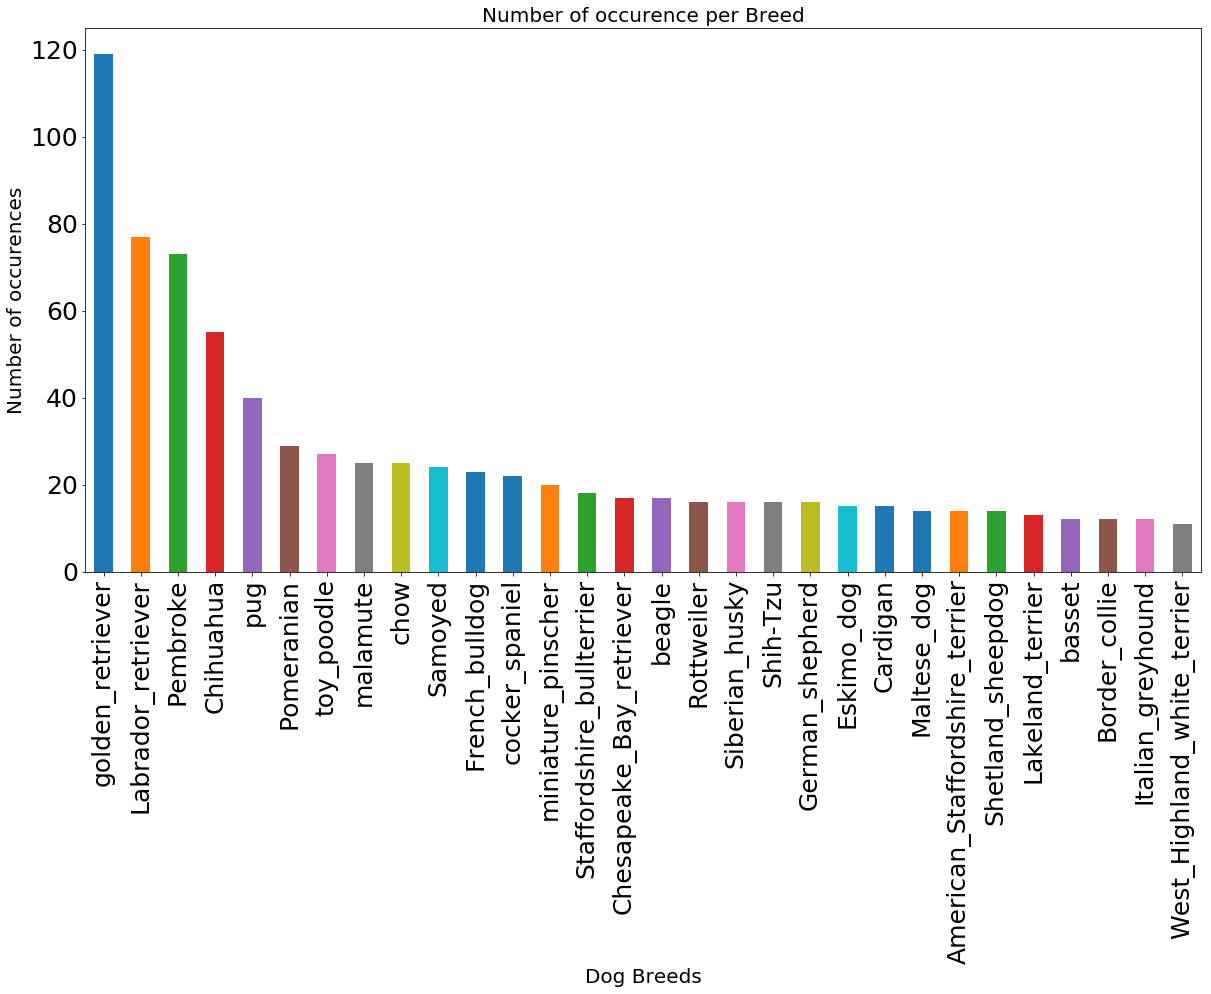

In [95]:
#plot a bar graph to counts each breed occurence
df_clean.suggested_breed.value_counts().iloc[:30].plot(kind='bar', figsize=(20,10), fontsize=25)
plt.ylabel('Number of occurences', fontsize=20)
plt.xlabel('Dog Breeds', fontsize=20)
plt.title('Number of occurence per Breed', fontsize=20);


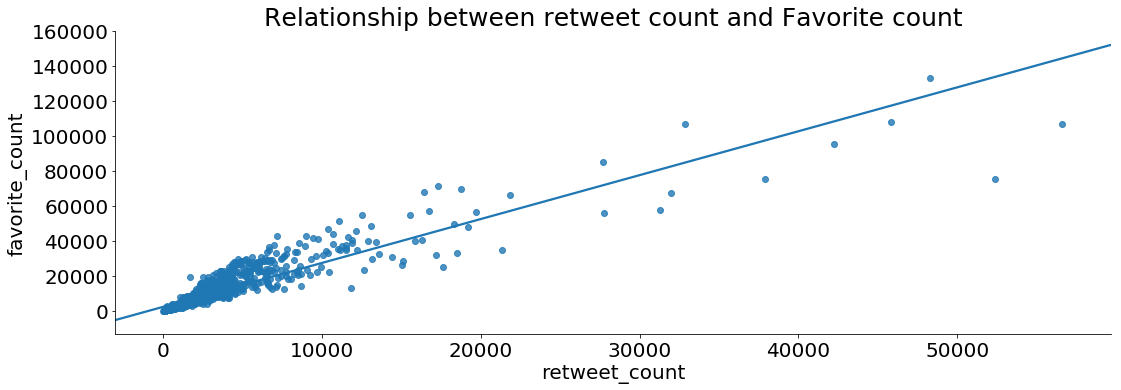

In [97]:
# A scatter plot with regression line of dog favorite count vs retweet count
sns.lmplot(x = "retweet_count", y = "favorite_count",ci = None, aspect = 3, data = df_clean)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('retweet_count',fontsize=20)
plt.ylabel('favorite_count',fontsize=20)
plt.title('Relationship between retweet count and Favorite count', fontsize=25);

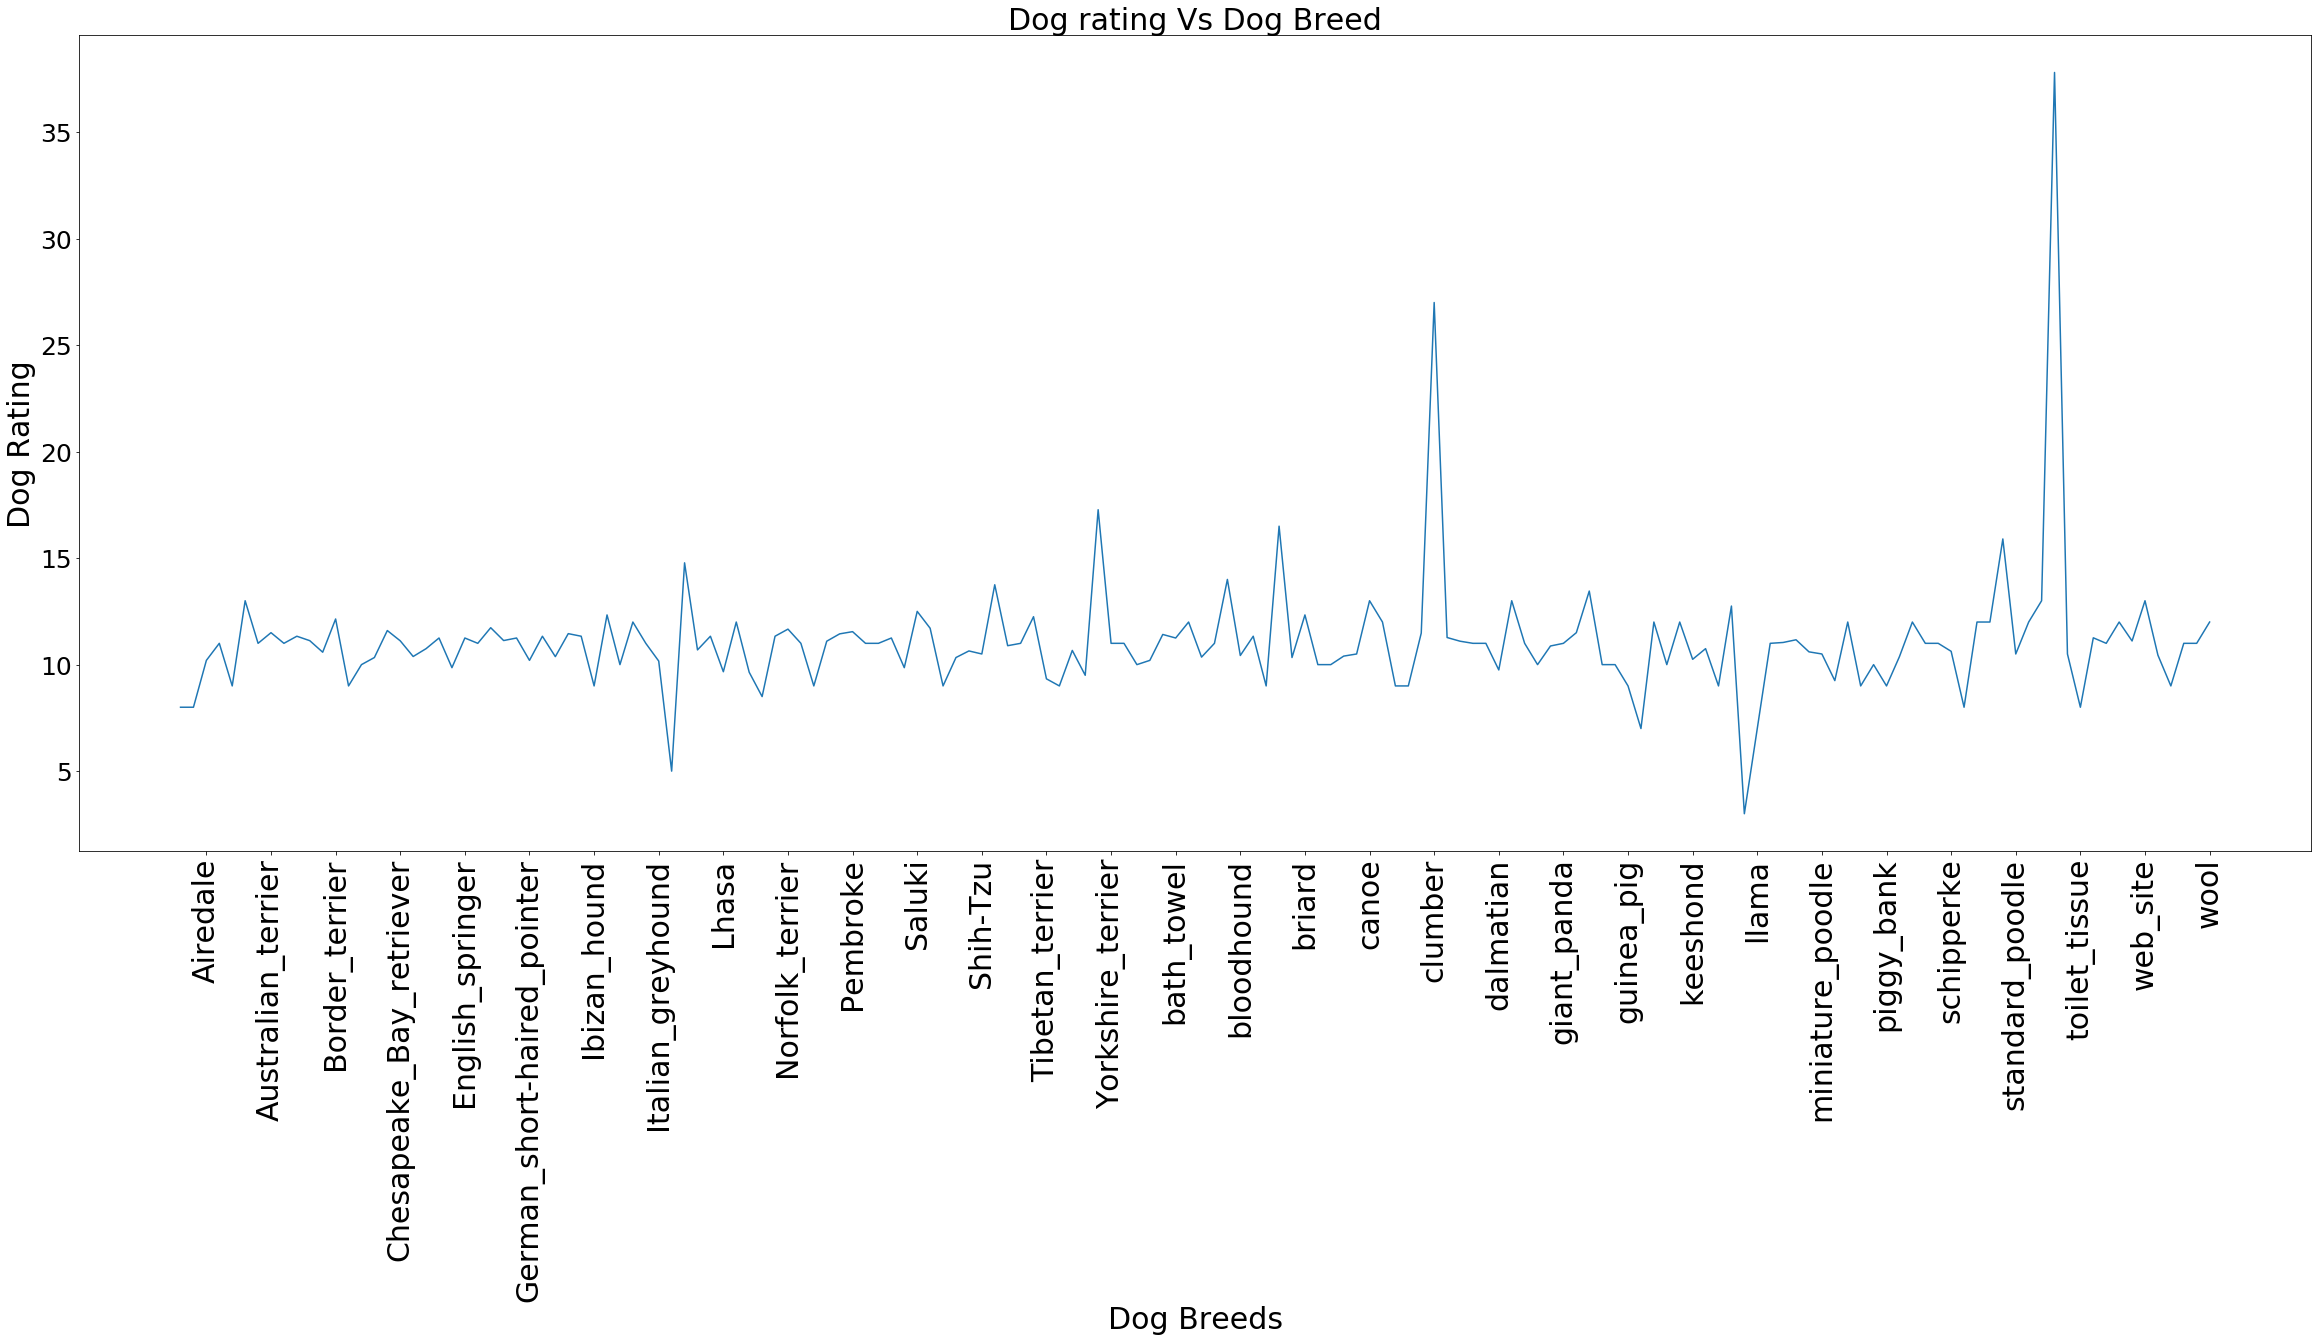

In [98]:
#plot the distribution between Dog Breeds and ratings using the groupby function
df_clean.groupby('suggested_breed')['rating_numerator'].mean().plot(xticks=np.arange(2,160,5),alpha=1, figsize=(40,15))
plt.xticks(rotation='vertical', fontsize=30)
plt.yticks(fontsize=25)
plt.xlabel('Dog Breeds',fontsize=30)
plt.ylabel('Dog Rating',fontsize=30)
plt.title('Dog rating Vs Dog Breed',fontsize=30);

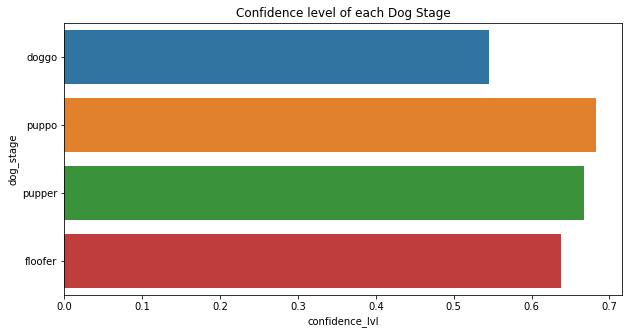

In [100]:
# horizontal bar plot of the confidence level of each dog stage.
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y='dog_stage', x='confidence_lvl',ci=None, data=df_clean)
plt.title('Confidence level of each Dog Stage');

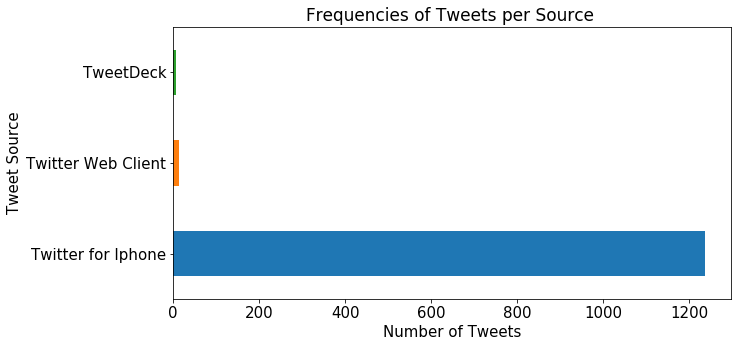

In [101]:
# horizontal bar plot of the number of tweet from each source 
df_clean.source.value_counts().plot(kind='barh',figsize=(10,5), fontsize=15)
plt.ylabel('Tweet Source', fontsize=15)
plt.xlabel('Number of Tweets', fontsize=15)
plt.title('Frequencies of Tweets per Source ', fontsize=17);

In [ ]:
df_clean

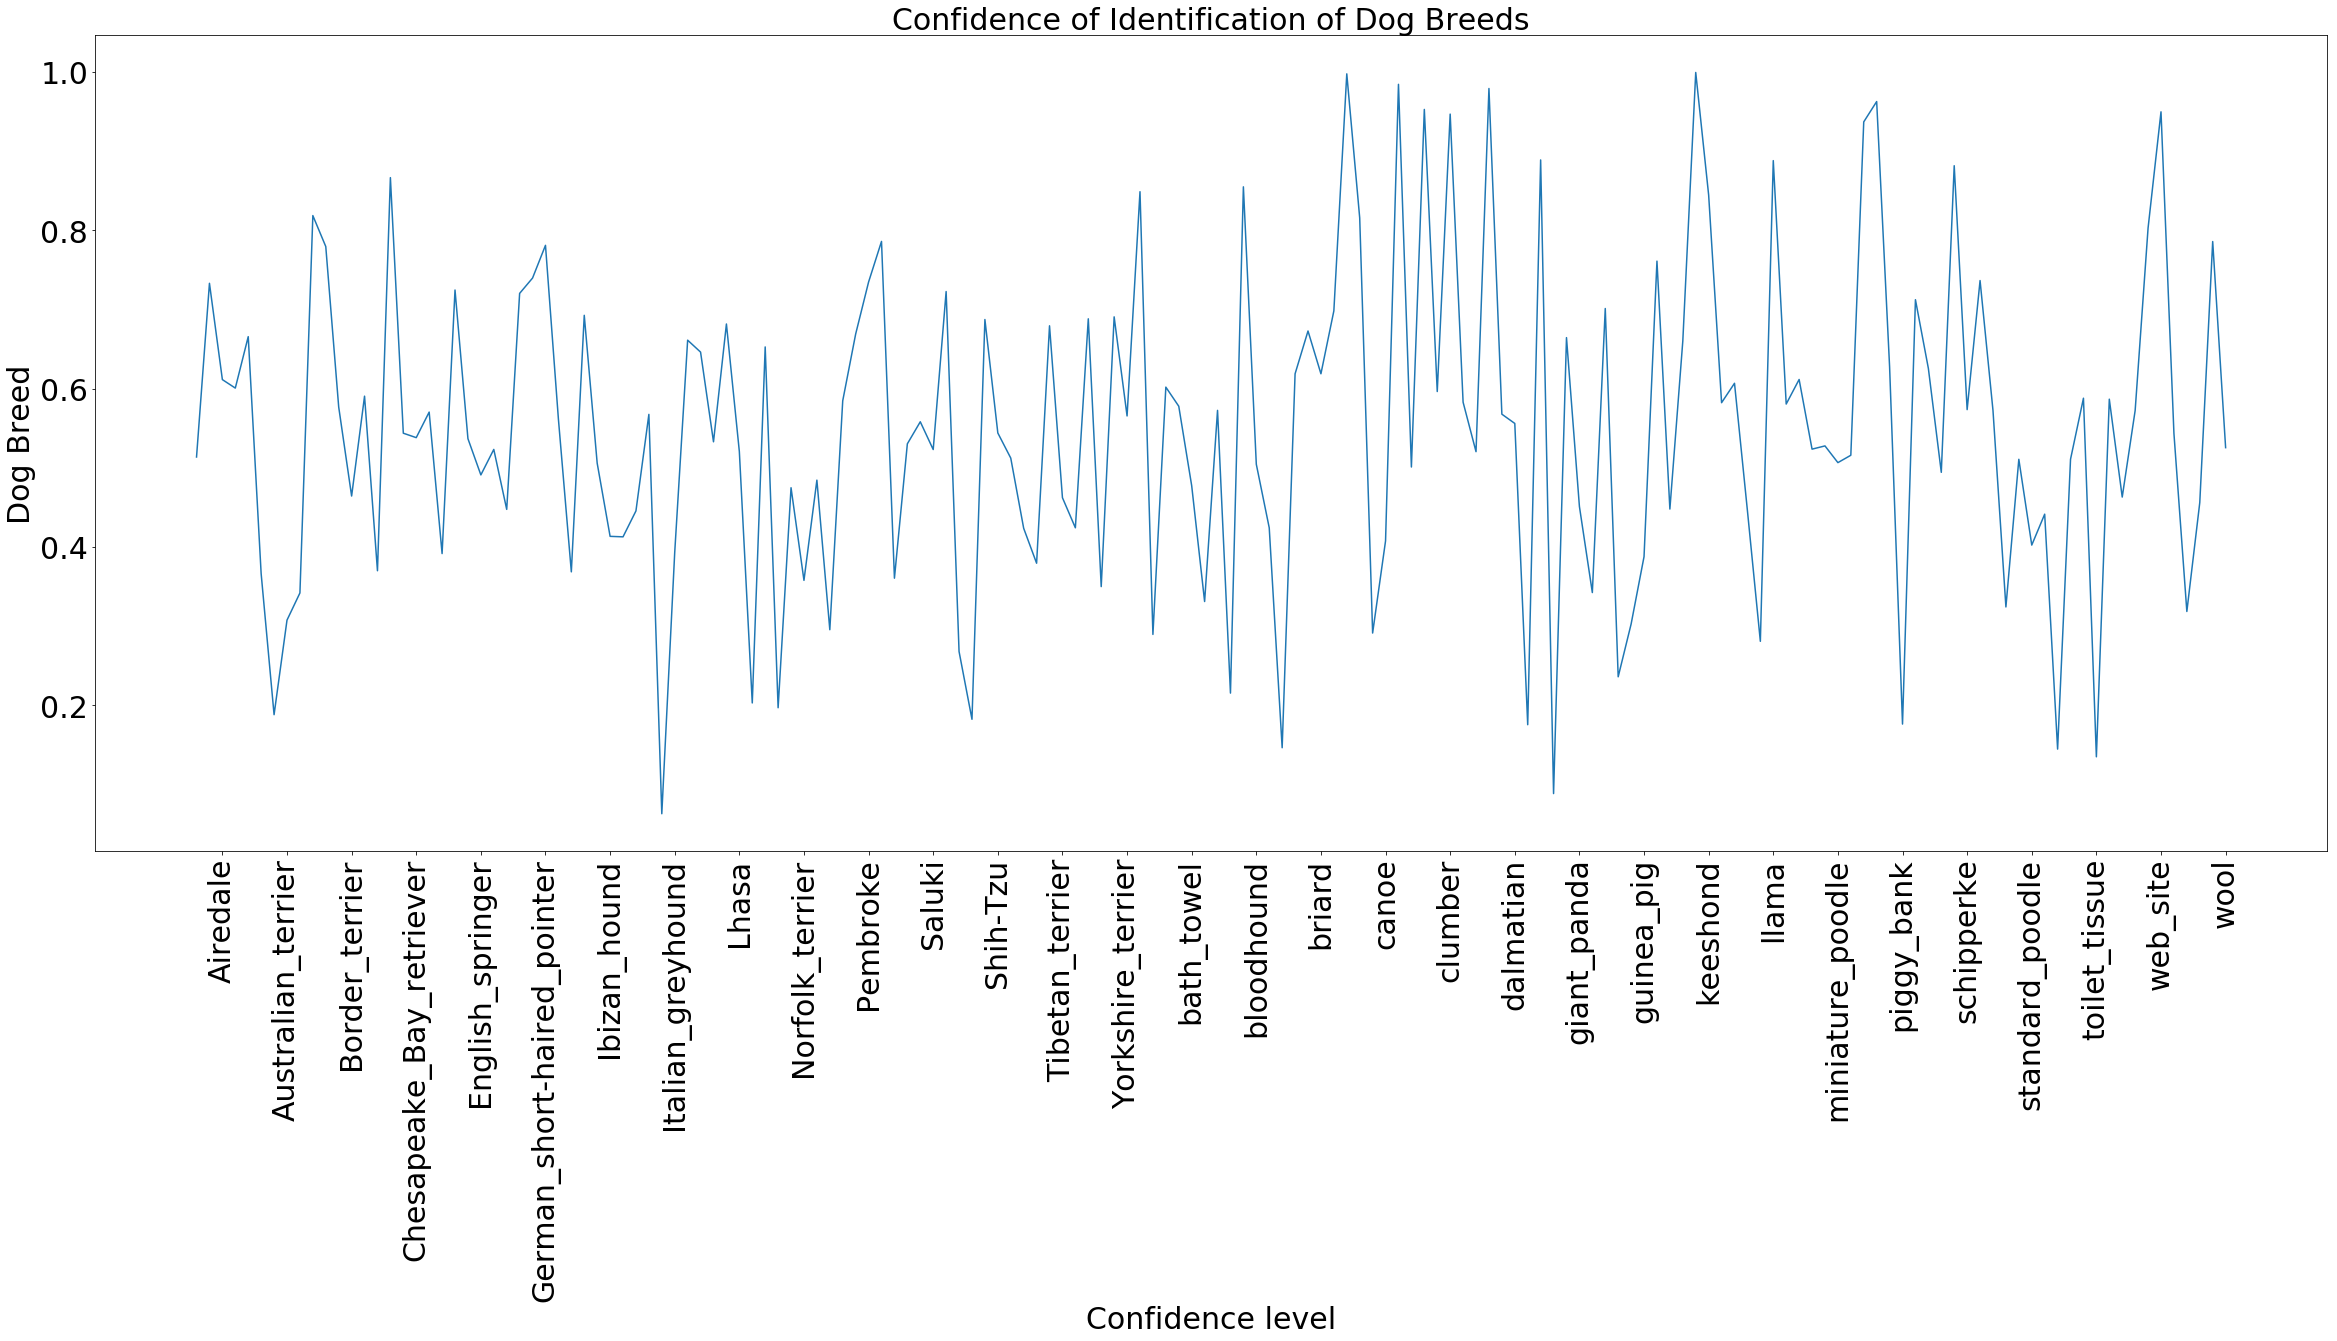

In [102]:
#plot of suggested breed against Confidence level
df_clean.groupby('suggested_breed')['confidence_lvl'].mean().plot(xticks=np.arange(2,160,5),alpha=1, figsize=(40,15))
plt.xticks(rotation='vertical', fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Confidence level', fontsize=30)
plt.ylabel('Dog Breed', fontsize=30)
plt.title('Confidence of Identification of Dog Breeds', fontsize=30);


### Insights:

1. Golden Retriever of all Breeds has the highest tweets of 120.

2. Favorite Count and Retweet Count are linearly related.

3. The Clumber Breed has the Highest Dog rating of over 35.

4. Twitter for Iphone(Iphone Users) Tweeted the most than every other Tweeting Source with Tweets of about 3500, Tweet Deck tweeted least with tweets of less than 50.
5. Italian greyhound and giant panda has the lowest confidence level, while keeshound, Clumber has the highest confidence level.
6. Puppo Dog stage has the highest Confidence level of almost 0.7, while Doggo Dog stage has the least of 0.53.